In [7]:
#!pip install nltk

In [1]:
cd '/content/drive/MyDrive/Colab Notebooks/SKT_FLY_AI_4th/Week_3/Day_10'

/content/drive/MyDrive/Colab Notebooks/SKT_FLY_AI_4th/Week_3/Day_10


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('law_train.csv')
test = pd.read_csv('law_test.csv')
train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [4]:
test.head()

,ID,first_party,second_party,facts
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa..."
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a..."


# Data Preprocessing

In [5]:
vectorizer = TfidfVectorizer()
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts'])
    else:
        X_facts = vectorizer.transform(df['facts'])
    X_party1 = vectorizer.transform(df['first_party'])
    X_party2 = vectorizer.transform(df['second_party'])

    X = np.concatenate([X_party1.toarray(), X_party2.toarray(), X_facts.toarray()], axis=1)
    return X

In [6]:
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

In [7]:
print(f'X_trian 차원 = {X_train.shape}')
print(f'Y_trian 차원 = {Y_train.shape}')
print(f'X_test 차원 = {X_test.shape}')

X_trian 차원 = (2478, 52377)
Y_trian 차원 = (2478,)
X_test 차원 = (1240, 52377)


In [12]:
type(X_train)

numpy.ndarray

In [8]:
vocab_size = len(X_train[0])
print(vocab_size)

52377


# Data Preprocessing2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# 단어 빈도수 계산
word_freq = pd.Series(filtered_tokens).value_counts()
word_freq

court        8503
district     3077
appeals      2019
state        1944
federal      1886
             ... 
candor          1
excretion       1
itemized        1
warrent         1
province        1
Length: 16140, dtype: int64

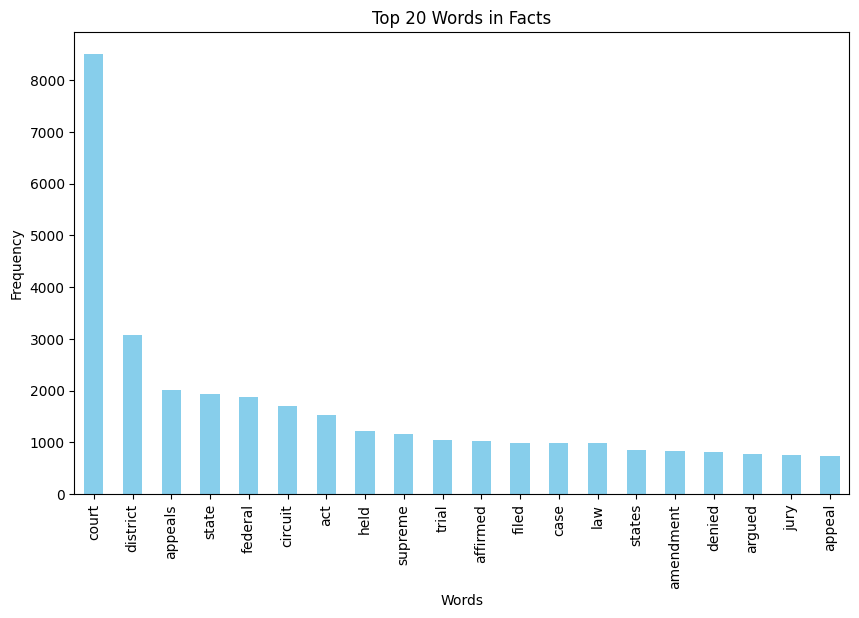

In [12]:
# 상위 20개 단어 시각화
plt.figure(figsize=(10, 6))
word_freq.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Words in Facts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [19]:
# 판결이 0인 경우와 1인 경우로 데이터 나누기
facts_0 = train[train['first_party_winner'] == 0]['facts']
facts_1 = train[train['first_party_winner'] == 1]['facts']

In [16]:
# 함수: 텍스트 데이터 전처리 및 시각화
def visualize_wordcloud(facts, title):
    # 텍스트 데이터 추출
    facts_text = ' '.join(facts.values)

    # 단어 토큰화
    tokens = word_tokenize(facts_text)

    # 불용어 제거
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # 단어 빈도수 계산
    word_freq = pd.Series(filtered_tokens).value_counts()

    # 워드클라우드 시각화
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Facts ({title})')
    plt.show()


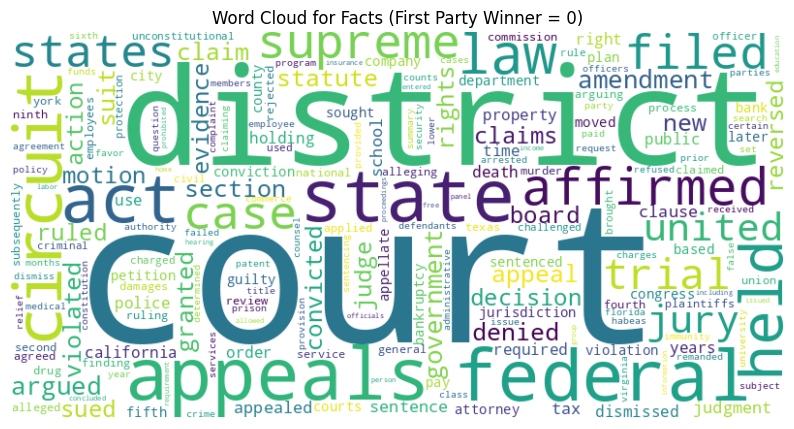

In [20]:
# 시각화: 판결이 0일 때의 Word Cloud
visualize_wordcloud(facts_0, 'First Party Winner = 0')


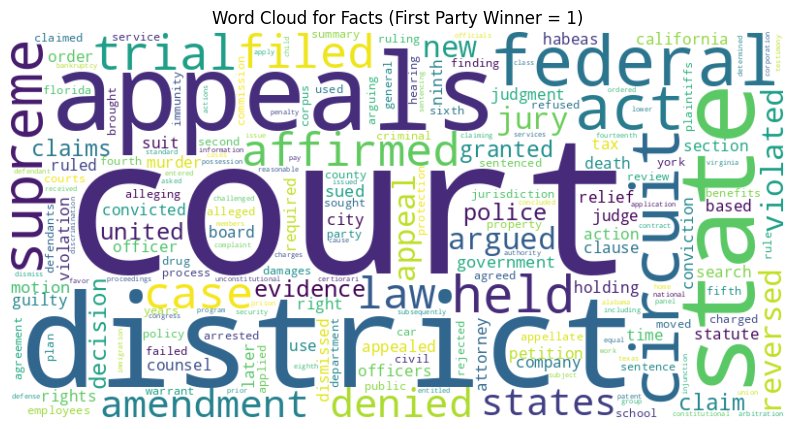

In [21]:
# 시각화: 판결이 1일 때의 Word Cloud
visualize_wordcloud(facts_1, 'First Party Winner = 1')

# Define Model & Train (Logistic Regression)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [10]:
submit = pd.read_csv('law_sample_submission.csv')

In [ ]:
pred = model.predict(X_test)

In [ ]:
submit['first_party_winner'] = pred
submit.to_csv('./baseline_submit.csv', index=False)

In [ ]:
submit

,ID,first_party_winner
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,1
...,...,...
1235,TEST_1235,0
1236,TEST_1236,1
1237,TEST_1237,1
1238,TEST_1238,1


# Define Model & Train (LSTM)

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE

In [11]:
model = Sequential()

model.add(LSTM(units=128, input_shape=(vocab_size, 1)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74881 (292.50 KB)
Trainable params: 74881 (292.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
78/78 [==============================] - 114s 1s/step - loss: 0.6966 - accuracy: 0.6017
Epoch 2/10
78/78 [==============================] - 111s 1s/step - loss: 0.6377 - accuracy: 0.6655
Epoch 3/10
78/78 [==============================] - 112s 1s/step - loss: 0.6383 - accuracy: 0.6655
Epoch 4/10
78/78 [==============================] - 111s 1s/step - loss: 0.6383 - accuracy: 0.6655
Epoch 5/10
78/78 [==============================] - 111s 1s/step - loss: 0.6384 - accuracy: 0.6655
Epoch 6/10
78/78 [==============================] - 110s 1s/step - loss: 0.6386 - accuracy: 0.6655
Epoch 7/10
78/78 [==============================] - 110s 1s/step - loss: 0.6385 - accuracy: 0.6655
Epoch 8/10
78/78 [==============================] - 110s 1s/step - loss: 0.6385 - accuracy: 0.6655
Epoch 9/10
78/78 [==============================] - 113s 1s/step - loss: 0.6386 - accuracy: 0.6655
Epoch 10/10
78/78 [==============================] - 110s 1s/step - loss: 0.6381 - accuracy: 0.6655


In [ ]:
pred = model.predict(X_test)

39/39 [==============================] - 27s 671ms/step


In [ ]:
lstm_submit

,ID,first_party_winner
0,TEST_0000,0.654377
1,TEST_0001,0.654377
2,TEST_0002,0.654377
3,TEST_0003,0.654377
4,TEST_0004,0.654377
...,...,...
1235,TEST_1235,0.654377
1236,TEST_1236,0.654377
1237,TEST_1237,0.654377
1238,TEST_1238,0.654377


In [ ]:
l_model = Sequential()

l_model.add(LSTM(units=128, input_shape=(vocab_size, 1)))
l_model.add(Dropout(0.3))
l_model.add(Dense(units=64, activation='relu'))
l_model.add(Dropout(0.3))
l_model.add(Dense(units=1, activation='sigmoid'))
l_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

l_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 74881 (292.50 KB)
Trainable params: 74881 (292.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
#모델의 val_loss가 3epoch 동안 동일하면 학습을 중단

history = l_model.fit(X_train, Y_train, epochs=10, callbacks=[early_stopping])

Epoch 1/10
78/78 [==============================] - 112s 1s/step - loss: 0.6506 - accuracy: 0.6626
Epoch 2/10
78/78 [==============================] - 109s 1s/step - loss: 0.6404 - accuracy: 0.6655
Epoch 3/10
78/78 [==============================] - 110s 1s/step - loss: 0.6396 - accuracy: 0.6655
Epoch 4/10
78/78 [==============================] - 111s 1s/step - loss: 0.6408 - accuracy: 0.6655
Epoch 5/10
78/78 [==============================] - 109s 1s/step - loss: 0.6383 - accuracy: 0.6655
Epoch 6/10
78/78 [==============================] - 110s 1s/step - loss: 0.6386 - accuracy: 0.6655
Epoch 7/10
78/78 [==============================] - 110s 1s/step - loss: 0.6387 - accuracy: 0.6655
Epoch 8/10
78/78 [==============================] - 110s 1s/step - loss: 0.6399 - accuracy: 0.6655


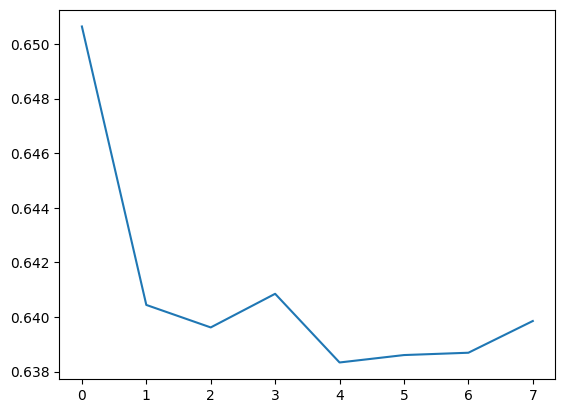

In [ ]:
import matplotlib.pyplot as plt
myloss = l_model.history.history['loss']
plt.plot(range(len(myloss)), l_model.history.history['loss'])

In [ ]:
pred = l_model.predict(X_test)

39/39 [==============================] - 25s 617ms/step


In [ ]:
pred

array([[0.66290563],
       [0.66290563],
       [0.66290563],
       ...,
       [0.66290563],
       [0.6629056 ],
       [0.6629056 ]], dtype=float32)

In [ ]:
lstm_submit2 = submit
lstm_submit2['first_party_winner'] = pred

In [ ]:
lstm_submit2

,ID,first_party_winner
0,TEST_0000,0.662906
1,TEST_0001,0.662906
2,TEST_0002,0.662906
3,TEST_0003,0.662906
4,TEST_0004,0.662906
...,...,...
1235,TEST_1235,0.662906
1236,TEST_1236,0.662906
1237,TEST_1237,0.662906
1238,TEST_1238,0.662906


In [11]:
model = Sequential()

model.add(LSTM(units=128, input_shape=(vocab_size, 1)))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74881 (292.50 KB)
Trainable params: 74881 (292.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
#모델의 val_loss가 3epoch 동안 동일하면 학습을 중단

history = model.fit(X_train, Y_train, epochs=10, callbacks=[early_stopping])

Epoch 1/10
78/78 [==============================] - 117s 1s/step - loss: 0.6486 - accuracy: 0.6614
Epoch 2/10
78/78 [==============================] - 109s 1s/step - loss: 0.6407 - accuracy: 0.6655
Epoch 3/10
78/78 [==============================] - 108s 1s/step - loss: 0.6452 - accuracy: 0.6655
Epoch 4/10
78/78 [==============================] - 109s 1s/step - loss: 0.6435 - accuracy: 0.6655
Epoch 5/10
78/78 [==============================] - 109s 1s/step - loss: 0.6432 - accuracy: 0.6655


In [ ]:
import matplotlib.pyplot as plt
myloss = l_model.history.history['loss']
plt.plot(range(len(myloss)), l_model.history.history['loss'])

In [ ]:
model3 = Sequential()

model3.add(LSTM(units=128, input_shape=(vocab_size, 1)))
model3.add(Dropout(0.3))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(units=1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

In [ ]:
lstm_submit2['first_party_winner'] = pred
lstm_submit.to_csv('lstm_submit.csv', index=False)